# EMG GESTURE: read and plot the data from HDF5

In [1]:
# import useful packages
import os

import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
# read hdf5 
fname = '../data/bitalino_emg_A12.hdf5'
with pd.HDFStore(fname, 'r') as store: 
    print(store.keys())
    emg_raw = pd.read_hdf(store, '/emg/raw', columns=['A1', 'A2'])
    emg_burst = pd.read_hdf(store, '/emg/burst')
    events = pd.read_hdf(store, '/events')


['/bitalino', '/events', '/emg/burst', '/emg/raw']


Text(0.5, 0.98, 'Data from file bitalino_emg_A12.hdf5')

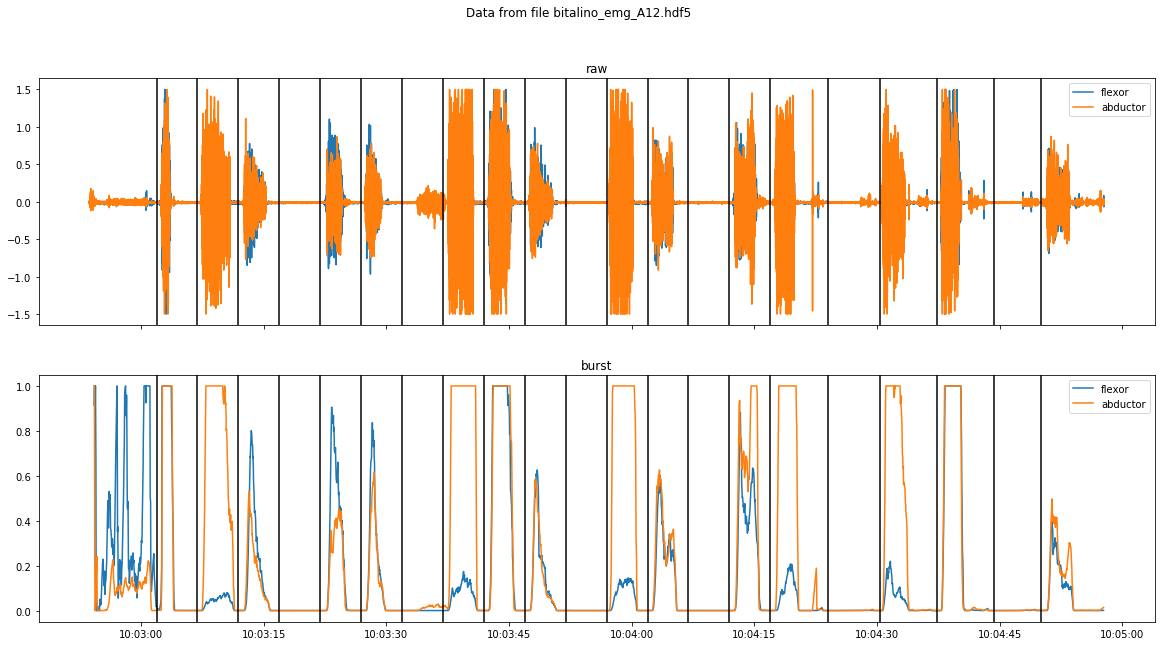

In [3]:
f, ax = plt.subplots(2, 1, sharex=True, figsize=(20, 10))
ax[0].plot(emg_raw)
ax[0].legend(['flexor', 'abductor'], loc=1)
ax[0].set_title('raw')
ax[1].plot(emg_burst)
ax[1].legend(['flexor', 'abductor'], loc=1)
ax[1].set_title('burst')
for onset in events[events.label=='trial_starts'].index:
    ax[0].axvline(onset, color='k')
    ax[1].axvline(onset, color='k')
plt.suptitle(f'Data from file {os.path.basename(fname)}')


In [4]:
# look at model predictions
events[events.label=='predict']

,label,data
2020-02-26 10:04:27.014454,predict,"{""result"": ""rest""}"
2020-02-26 10:04:33.298454,predict,"{""result"": ""scissors""}"
2020-02-26 10:04:40.354454,predict,"{""result"": ""rock""}"
2020-02-26 10:04:47.291454,predict,"{""result"": ""rest""}"
2020-02-26 10:04:53.082454,predict,"{""result"": ""paper""}"
